In [12]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")


In [3]:
data.shape

(73196, 38)

In [4]:
data.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT',
       'DISTRICT_CODE'],
      dtype='object')

In [5]:
data.sample(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,DISTRICT,DISTRICT_CODE
63514,A2083889391647640892,201812,81000.0,1350.000000,60,1,1,0,0,0,...,0,0,1,3.264898,0.451579,1.483360,-3.712106,40.387953,Usera,17
49348,A16019969772410667866,201809,144000.0,1714.285714,84,3,1,0,0,1,...,0,0,1,4.155135,0.195431,4.052471,-3.742698,40.393886,Latina,9
12047,A13406993077588735525,201803,312000.0,6240.000000,50,2,1,0,1,1,...,0,0,1,2.062930,0.276782,1.367731,-3.706624,40.434996,Chamberi,5
35445,A7994261768437562594,201812,1158000.0,4765.432099,243,3,2,0,0,0,...,0,0,1,0.058307,0.366470,0.861657,-3.704021,40.417084,Centro,3
2140,A17877965862281707704,201803,397000.0,4092.783505,97,4,2,1,1,1,...,0,0,1,3.436479,0.167862,1.960839,-3.671020,40.398415,Retiro,13
4861,A1400296748268194173,201803,129000.0,1984.615385,65,3,1,0,0,0,...,0,0,1,7.934160,0.726592,0.558329,-3.687628,40.486795,Fuencarral-El Pardo,7
40254,A16568003548273075013,201806,167000.0,3036.363636,55,2,1,0,0,0,...,0,0,1,5.357653,0.023445,0.515356,-3.695277,40.464281,Tetuan,16
33547,A17954443712178652492,201812,2129000.0,8251.937984,258,3,3,0,1,1,...,0,0,1,1.056567,0.239916,0.299659,-3.694985,40.423309,Centro,3
55336,A7675600681114175134,201809,102000.0,1500.000000,68,3,1,0,0,1,...,0,0,1,7.309833,0.391569,4.370513,-3.688270,40.351998,Villaverde,20
70115,A4966017106045681922,201806,140000.0,2153.846154,65,2,1,1,0,0,...,0,0,1,5.568280,0.232315,4.157142,-3.639911,40.428303,Ciudad Lineal,6


In [6]:
features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE', 'HASDOORMAN',
    'HASSWIMMINGPOOL', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
    'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 'HASWESTORIENTATION',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
    'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTRICT'
]

target = 'PRICE'


X = data[features].copy()
y = data[target].copy()


ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
district_encoded = ohe.fit_transform(X[['DISTRICT']])
district_cols = ohe.get_feature_names_out(['DISTRICT'])


X_encoded = pd.concat([
    X.drop(columns=['DISTRICT']).reset_index(drop=True),
    pd.DataFrame(district_encoded, columns=district_cols)
], axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")


y_pred = grid_search.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 46,001.19
RMSE: 83,964.41
R²: 0.9281


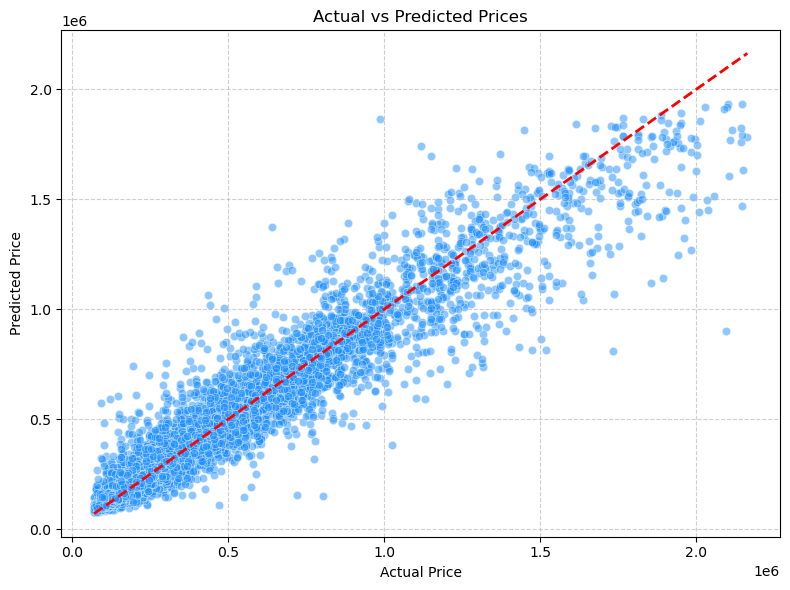

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
import numpy as np


df_errors = pd.DataFrame({
    'real': y_test,
    'predicho': y_pred
})

df_errors['ape'] = np.abs(df_errors['real'] - df_errors['predicho']) / df_errors['real'] * 100 

bins = [0, 5, 10, 15, 20, 25, 50, 100, np.inf]
labels = ['<=5%', '<=10%', '<=15%', '<=20%', '<=25%', '<=50%', '<=100%', '>100%']

df_errors['rango_error'] = pd.cut(df_errors['ape'], bins=bins, labels=labels, right=True)

tabla_error = df_errors['rango_error'].value_counts(normalize=True).sort_index() * 100

tabla_error

tabla_error_df = tabla_error.reset_index()
tabla_error_df.columns = ['Rango de error %', 'Porcentaje de predicciones']
tabla_error_df


,Rango de error %,Porcentaje de predicciones
0,<=5%,31.406709
1,<=10%,22.757396
2,<=15%,15.057730
3,<=20%,10.302658
4,<=25%,6.490401
5,<=50%,10.630594
6,<=100%,2.739632
7,>100%,0.614880


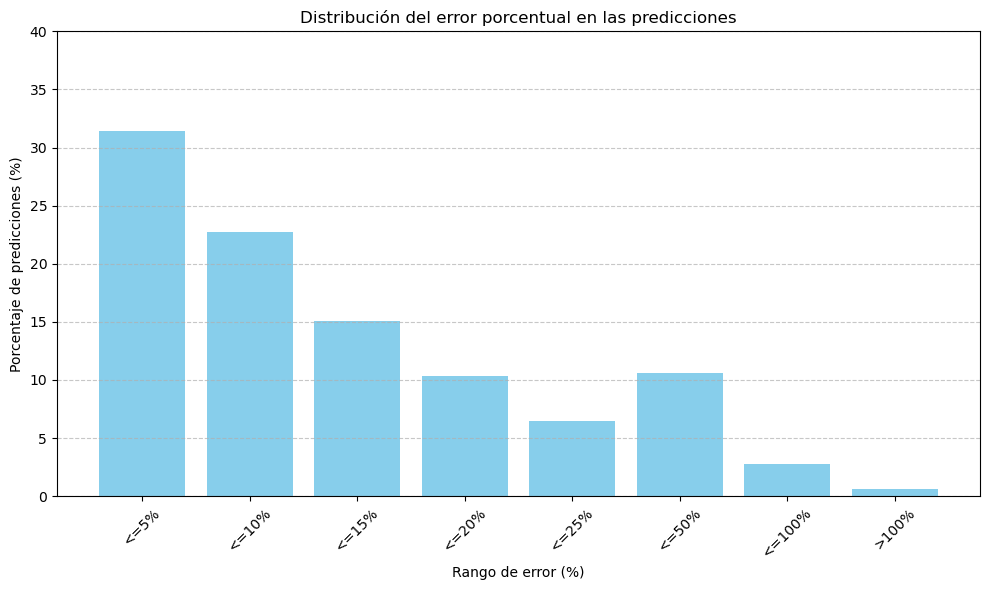

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(tabla_error_df['Rango de error %'], tabla_error_df['Porcentaje de predicciones'], color='skyblue')
plt.xlabel('Rango de error (%)')
plt.ylabel('Porcentaje de predicciones (%)')
plt.title('Distribución del error porcentual en las predicciones')
plt.xticks(rotation=45)
plt.ylim(0, 40) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()